In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches

In [15]:
from fer import FER
import cv2

In [41]:
image = cv2.imread("munbyul.jpg")
detector = FER()
detection = detector.detect_emotions(image)
print(detection)

image = np.stack([image[:, :, 2], image[:, :, 1], image[:, :, 0]], 2)
detection = detector.detect_emotions(image)
print(detection)

[OrderedDict([('box', (378, 85, 213, 213)), ('emotions', {'angry': 0.01, 'disgust': 0.0, 'fear': 0.65, 'happy': 0.0, 'sad': 0.19, 'surprise': 0.13, 'neutral': 0.01})]), OrderedDict([('box', (409, 250, 127, 127)), ('emotions', {'angry': 0.12, 'disgust': 0.0, 'fear': 0.07, 'happy': 0.27, 'sad': 0.44, 'surprise': 0.01, 'neutral': 0.09})])]
[OrderedDict([('box', (386, 89, 196, 196)), ('emotions', {'angry': 0.01, 'disgust': 0.0, 'fear': 0.35, 'happy': 0.01, 'sad': 0.13, 'surprise': 0.46, 'neutral': 0.04})])]


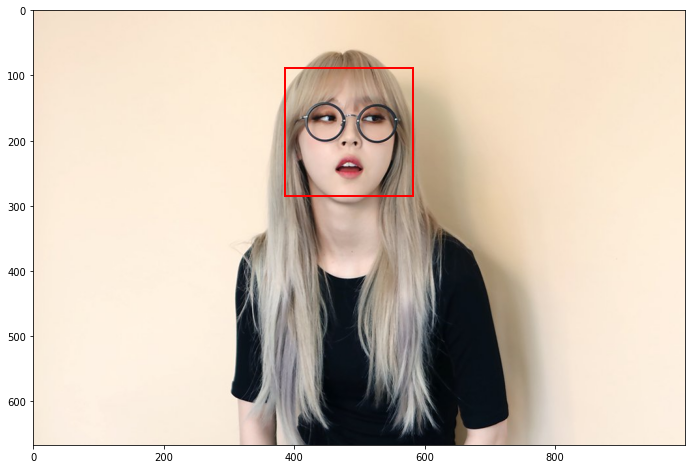

[{'angry': 0.01, 'disgust': 0.0, 'fear': 0.35, 'happy': 0.01, 'sad': 0.13, 'surprise': 0.46, 'neutral': 0.04}]


In [48]:
# image = face_recognition.load_image_file("munbyul.jpg")
# face_locations = face_recognition.face_locations(image)
# print(face_locations)

image = cv2.imread("munbyul.jpg")

image = np.stack([image[:, :, 2], image[:, :, 1], image[:, :, 0]], 2)

fig, ax = plt.subplots(figsize=(18, 8))
ax.imshow(image)

face_locations = [det['box'] for det in detection]
emotions = [det['emotions'] for det in detection]

for x1, y1, x2, y2 in face_locations:
#     rect = patches.Rectangle((y1, x1), y2 - y1, x2 - x1, edgecolor='r', facecolor="none", linewidth=2)
    rect = patches.Rectangle((x1, y1), x2, y2, edgecolor='r', facecolor="none", linewidth=2)
    ax.add_patch(rect)

plt.show()

print(emotions)
